<center><h1> پروژه ی دوم </h1><br> 
    <h3> Classification </h3>

    
 
<br>
<hr> 
<h3> 
    این پروژه را با دو روش مدل سازی شده است 
    روش های KNN و SVM
       <h3/>
       <center/> 
    

# خواندن کتابخانه ها

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

# خواندن دیتا

In [3]:
df = pd.read_csv('heart.csv' , index_col= False)
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# استاندارد سازی دیتا

In [34]:
X = np.asanyarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
Y = np.asanyarray(df['output'])
print('XS:\n', X[:5])
print('Ys:\n', Y[:5])

XS:
 [[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
Ys:
 [1 1 1 1 1]


In [36]:
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
print('XS:\n', X[:5])
print('Ys:\n', Y[:5])

XS:
 [[0.70833333 1.         1.         0.48113208 0.24429224 1.
  0.         0.60305344 0.         0.37096774 0.         0.
  0.33333333]
 [0.16666667 1.         0.66666667 0.33962264 0.28310502 0.
  0.5        0.88549618 0.         0.56451613 0.         0.
  0.66666667]
 [0.25       0.         0.33333333 0.33962264 0.17808219 0.
  0.         0.77099237 0.         0.22580645 1.         0.
  0.66666667]
 [0.5625     1.         0.33333333 0.24528302 0.25114155 0.
  0.5        0.81679389 0.         0.12903226 1.         0.
  0.66666667]
 [0.58333333 0.         0.         0.24528302 0.52054795 0.
  0.5        0.70229008 1.         0.09677419 1.         0.
  0.66666667]]
Ys:
 [1 1 1 1 1]


## مصور سازی لولیه

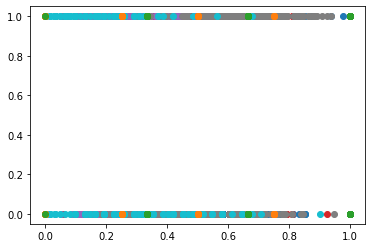

In [37]:
for i in range(X.shape[1]):
    plt.scatter(X[:,i],Y)
    
plt.show()

# جداسازی دیتا برای شروع یادگیری

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


   <h1> <center>     مدل اول     </center></h1>


<h2> روش یادگیری:   </h2>K nearest neighbor 
<br>
    
از آن جا که برچسب ها باینری هستند بهترین و تنهاترین K که میتوانیم استفاده کنیم K = 2 است

In [39]:
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train,y_train)

yhat = neigh.predict(X_test)

neigh.c

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

AttributeError: 'KNeighborsClassifier' object has no attribute 'c'

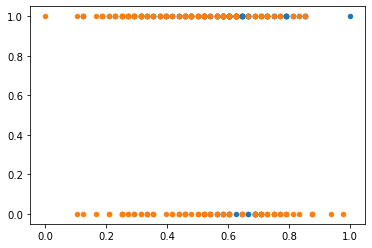

In [40]:

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, 2))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

u_labels = set(Y)

for k, col in zip(u_labels, colors) :


    my_members = (Y == k)
  
    ax.scatter(X[my_members, 0], X[my_members, 1], s = 20 )


In [41]:
print( "The best accuracy was with", metrics.accuracy_score(y_test, yhat), "with k=", 2) 

The best accuracy was with 0.8032786885245902 with k= 2


   <h1> <center>     مدل دوم     </center></h1>

<h2> روش یادگیری:   </h2>ُSVM 
<br>

In [43]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat = clf.predict(X_test)

print(y_test[:10])
print(yhat [0:10])

[1 0 1 1 0 0 0 1 1 1]
[1 0 1 1 0 0 0 1 1 1]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


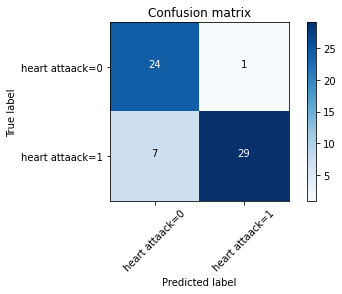

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['heart attaack=0','heart attaack=1'],normalize= False,  title='Confusion matrix')

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8699169682776241

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 1)

0.7837837837837838